In [64]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from tqdm import tqdm_notebook as tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

import warnings
warnings.filterwarnings('ignore')


In [42]:
trend1 = pd.read_csv('naver_datalab_shoppingInsight_category_일간_data_20220928092616.csv',encoding='utf-8')
trend1.head()

,날짜,향수
0,2021-09-27,73
1,2021-09-28,73
2,2021-09-29,71
3,2021-09-30,69
4,2021-10-01,69


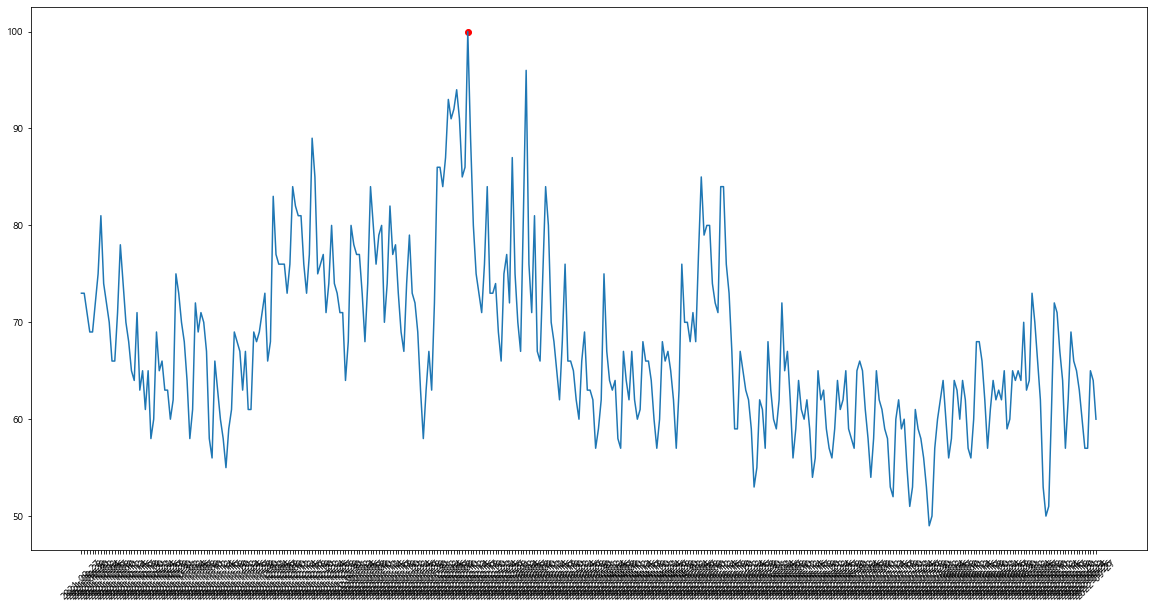

In [66]:
plt.figure(figsize=(20,10))
plt.plot(trend1["날짜"], trend1["향수"])
plt.scatter(['2022-02-13'],[trend1[trend1['날짜'] == '2022-02-13']["향수"]], c='red')
plt.xticks(rotation=45)
plt.xlim()
plt.show()

<Figure size 1440x720 with 0 Axes>

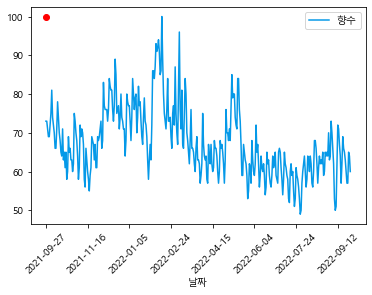

In [54]:
plt.figure(figsize=(20,10))
trend1.plot(x='날짜',y='향수',c='#0599e8')
plt.xticks(rotation=45)
plt.scatter(['2022-02-13'],[trend1[trend1['날짜'] == '2022-02-13']["향수"]], c='red')
plt.show()

In [58]:
type(trend1["날짜"][0])

str

In [ ]:
trend1.loc[trend1['날짜'] == '2022-02-13']['날짜']

In [70]:
trend = pd.read_csv('2017-2018.csv',encoding='utf-8')
trend1 = pd.read_csv('2018-2019.csv',encoding='utf-8')
trend2 = pd.read_csv('2019-2020.csv',encoding='utf-8')
trend3 = pd.read_csv('2020-2021.csv',encoding='utf-8')
trend4 = pd.read_csv('2021-2022.csv',encoding='utf-8')
trend.head()

,날짜,향수
0,2017-09-27,30
1,2017-09-28,20
2,2017-09-29,26
3,2017-09-30,25
4,2017-10-01,26


In [74]:
trend_total = pd.concat([trend,trend1,trend2,trend3,trend4])
trend_total['날짜']=trend_total.날짜.str[:4]
trend_total

,날짜,향수
0,2017,30
1,2017,20
2,2017,26
3,2017,25
4,2017,26
...,...,...
361,2022,43
362,2022,48
363,2022,50
364,2022,68


In [104]:
trend_2017 = pd.Series(trend_total[trend_total['날짜'] == '2017']['향수'].sum())
trend_2018 = pd.Series(trend_total[trend_total['날짜'] == '2018']['향수'].sum())
trend_2019 = pd.Series(trend_total[trend_total['날짜'] == '2019']['향수'].sum())
trend_2020 = pd.Series(trend_total[trend_total['날짜'] == '2020']['향수'].sum())
trend_2021 = pd.Series(trend_total[trend_total['날짜'] == '2021']['향수'].sum())
trend_2022 = pd.Series(trend_total[trend_total['날짜'] == '2022']['향수'].sum())
trend_every = pd.DataFrame({'2017':trend_2017,'2018':trend_2018,'2019':trend_2019,'2020':trend_2020,'2021':trend_2021,'2021':trend_2022})
trend_every

,2017,2018,2019,2020,2021
0,3579,17811,22879,23026,15814


In [211]:
trend_every.values

array([[ 3579, 17811, 22879, 23026, 15814]], dtype=int64)

In [216]:
t = trend_every.T
t.columns = ['검색량']
t

,검색량
2017,3579
2018,17811
2019,22879
2020,23026
2021,15814


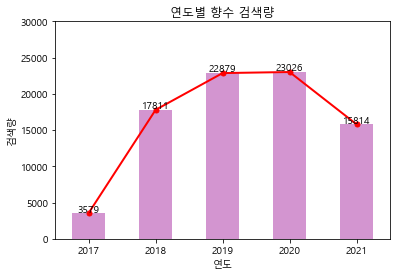

<Figure size 432x288 with 0 Axes>

In [269]:
t = trend_every.T
t.columns = ['검색량']
t

temp = t['검색량']
y = temp[['2017','2018','2019','2020','2021']]
y

ax = t.plot(kind='bar',legend=None, color='#d395d0')
# #'#ffc000', '#8fd9b6', '#d395d0', 0599e8

plt.plot(y, c='r', marker = 'o', ls='-', lw = 2, ms = 5, mfc = 'r', mew = 1, mec = 'r')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%height, (left+width/2, height*1.01), ha='center')

plt.xticks(rotation=0)
plt.ylim(0,30000)
plt.xlabel('연도')
plt.ylabel('검색량')
plt.title('연도별 향수 검색량')
plt.show()
plt.savefig('향수검색량(네이버).png')

In [236]:
money1 = pd.read_csv('화장품과향수 수출입.csv',encoding='cp949')
money1.head()

,품목별,항목,단위,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,...,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월
0,총액,수출액[천달러],천달러,43103061.0,40911819.0,46167204.0,36270183.0,34854511.0,39214071.0,42785144.0,...,55913862.0,55660373.0,60330542.0,60734117.0,55460865.0,54154313.0,63785078.0,57849157.0,61579891.0,57625856.0
1,총액,수입액[천달러],천달러,42718100.0,36977247.0,41803860.0,37932611.0,34661974.0,35794860.0,38849185.0,...,51636341.0,53847824.0,57357549.0,61159671.0,60363481.0,53133762.0,63593038.0,60326206.0,63194249.0,60200435.0
2,식품 및 산동물,수출액[천달러],천달러,464273.0,468124.0,545261.0,545869.0,460918.0,531000.0,542869.0,...,602458.0,690808.0,744879.0,786504.0,626650.0,611226.0,714919.0,724140.0,710015.0,662101.0
3,식품 및 산동물,수입액[천달러],천달러,2627428.0,2005395.0,2262352.0,2304002.0,2379665.0,2301011.0,2413044.0,...,2641506.0,2754248.0,3021359.0,3096336.0,3038687.0,2623332.0,3376922.0,3248464.0,3261850.0,2977361.0
4,중분류 03의 동물을 제외한 산 동물,수출액[천달러],천달러,190.0,398.0,181.0,120.0,195.0,387.0,443.0,...,587.0,711.0,827.0,615.0,612.0,530.0,775.0,548.0,729.0,590.0


In [ ]:
money1.index.str.contains('향수')

In [246]:
money = pd.read_csv('화장품과향수_수출입_1.csv',encoding='utf-8',index_col='품목별')
money

,항목,단위,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,2020.08 월,...,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월
품목별,,,,,,,,,,,,,,,,,,,,,
"향수 및 화장품,화장용품(비누제외)",수출액[천달러],천달러,457396,511342,751075,549864,550866,540095,581815,564114,...,852136,781467,856152,671517,553822,559575,693407,696093,821203,646052
"향수 및 화장품,화장용품(비누제외)",수입액[천달러],천달러,145211,134051,131773,122813,106444,121283,127440,123310,...,135540,142346,137730,156103,135690,140972,158256,149163,141925,151026


In [247]:
money.T.iloc[2:,:].index.str[:7]

Index(['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

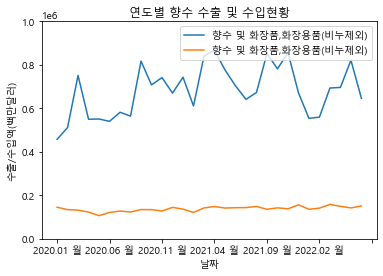

In [248]:
plt.figure(figsize=(20,10))
# plt.plot(data=money)
money.T.iloc[2:,:].plot()
plt.title('연도별 향수 수출 및 수입현황')
plt.xlabel('날짜')
plt.ylabel('수출/수입액(백만달러)')
plt.ylim(0,1000000)
plt.legend(loc='upper right')

In [250]:
m = money.transpose()
index = m.index[2:]
m = m.loc[index]
m.columns = ["export", "import"]
m

,export,import
2020.01 월,457396,145211
2020.02 월,511342,134051
2020.03 월,751075,131773
2020.04 월,549864,122813
2020.05 월,550866,106444
2020.06 월,540095,121283
2020.07 월,581815,127440
2020.08 월,564114,123310
2020.09 월,817107,134287
2020.10 월,707818,134055


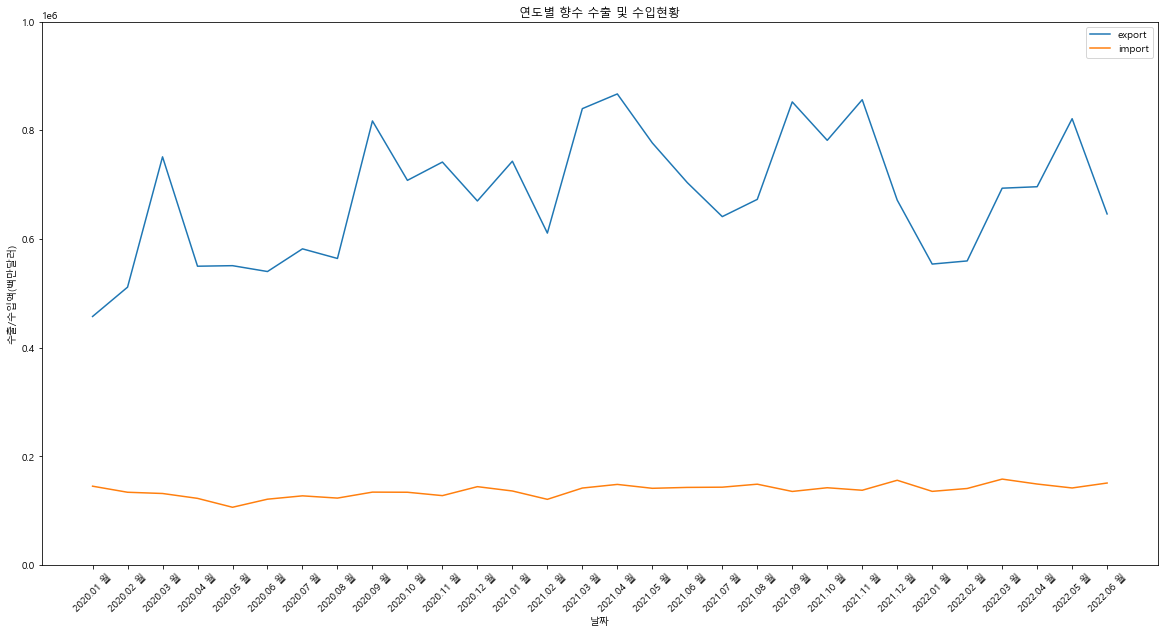

<Figure size 432x288 with 0 Axes>

In [272]:
# sns.lineplot(x=m.index, y='export', hue = m.columns, data=m)
# sns.lineplot(x=m.index,y='import', hue = m.columns, data=m)

plt.figure(figsize=(20,10))
plt.plot(m["export"],label='export')
plt.plot(m["import"],label='import')
plt.title('연도별 향수 수출 및 수입현황')
plt.xlabel('날짜')
plt.ylabel('수출/수입액(백만달러)')
plt.ylim(0,1000000)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
plt.savefig('향수_수출입.jpg',dpi=600)